# Your Title Information Goes Here
Solo Jacket Project

## Setup

In [12]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Manifest.toml`


  Activating project at `~/Documents/GitHub/CHEME-5660-Project-Template-F23`


  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Manifest.toml`


    Updating registry at `~/.julia/registries/General.toml`


    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`


  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/CHEME-5660-Project-Template-F23/Manifest.toml`


## Prerequisites: Load historical dataset, compute expected returns and get 2023 `SPY` data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018` until `12-01-2023`, along with data for a few exchange traded funds and volatility products during that time. 

In [106]:
original_dataset = load(joinpath(_PATH_TO_DATA, 
        "/Users/moitra/Documents/GitHub/CHEME-5660-Project-Template-F23/data/SP500-Daily-OHLC-1-3-2018-to-11-17-2023.jld2")) |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [107]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [108]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array:

In [109]:
all_tickers = keys(dataset) |> collect |> sort;
K = length(all_tickers);

### Get the 2023 `SPY` data

In [110]:
startdate = Date(2023,01,03);
SPY_dataset = dataset["SPY"];
SPY_df = filter(:timestamp => x-> x >= startdate, SPY_dataset);

### Compute the expected return for all firms in the dataset
The expected return $\mathbb{E}(r_{i})$ and covariance matrix $\Sigma$ will be used in our calculations, so we'll provide values for both of these items for the entire data set (all `N = 459` tickers), and then you can pick out which tickers you are interested in. 

* First, we compute the expected (annualized) log return by passing the `dataset` and the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_array` array) to the `log_return_matrix(...)` method. The result is stored in the `all_firms_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [111]:
all_firms_return_matrix = log_return_matrix(dataset, all_tickers, 
    Δt = (1.0/252.0), risk_free_rate = 0.0);

## Your project starts here ....

In [112]:
## Fill me in
#Lets get started 
μ = mean(all_firms_return_matrix, dims=1) |> vec;

Now before doing anything else lets break down what we need to achieve:
1. Identify Capital and Operating Costs:
Capital Expenses:
Building and Equipment: $5 million
Annual Operating Expenses (for each clinic):
Staffing (2 doctors, 3 Physician Assistants): 5 * (2 + 3) * Median Local Annual Wage
Supply and Utility Costs: $10,000 * 12
Total Operating Expenses per Clinic: Sum of Staffing and Supply/Utility Costs
Total Annual Operating Expenses (16 clinics): 16 * Total Operating Expenses per Clinic
2. Structure the Endowment:
Determine the annual endowment amount required to cover operating expenses and 20% reinvestment payment.
Ensure the face value of the endowment covers the initial capital expense ($5 million).
3. Quantify the Initial Grant Size and Develop an Investment Portfolio:
Use historical risky asset pricing data (2018-2022) and risk-free auction data (2022) to define an investment portfolio.
Evaluate portfolio performance based on 2023 data.
If the portfolio doesn't meet obligations, consider reallocating assets.


Average salary for physician assistant: 57,719,800 UGX or 15,228.39 United States Dollar #https://worldsalaries.com/average-physician-assistant-salary-in-kampala/uganda/
Average salary for doctors: 89,281,500 UGX or 23,555.41 United States Dollar #https://worldsalaries.com/average-doctor-salary-in-kampala/uganda/


In [113]:
sims = load(joinpath(_PATH_TO_DATA, "/Users/moitra/Documents/GitHub/CHEME-5660-Project-Template-F23/data/SIMs-Solo Jacket-PD1-CHEME-5660-Fall-2023.jld2")) |> x->x["sims"];

In [114]:
index_SPY = findfirst(x->x=="SPY", all_tickers);
r_SPY = μ[index_SPY]

0.08726475731522582

In [116]:
σₘ = std(all_firms_return_matrix[:, index_SPY])

2.5414369559913688

In [117]:
# Constants
discount_rate = 0.05
project_duration_years = 10
initial_capital_expense = 5_000_000
doctors_per_clinic = 2
physician_assistants_per_clinic = 3
doctor_salary_usd = 23_555.41 * doctors_per_clinic
pa_salary_usd = 15_228.39 * physician_assistants_per_clinic
monthly_supply_utility_cost = 10_000
annual_reinvestment_rate = 0.20

# Calculate operating expenses for each clinic
annual_operating_expense_per_clinic_total = (doctor_salary_usd + pa_salary_usd)  + monthly_supply_utility_cost * 12

# Calculate total operating expenses for all clinics over ten years
total_operating_expenses = annual_operating_expense_per_clinic_total * 16 #15 sattelite +main

# Calculate total reinvestment over ten years
total_reinvestment = initial_capital_expense * annual_reinvestment_rate * project_duration_years

# Calculate total capital and operating costs
total_capital_and_operating_costs = initial_capital_expense + total_operating_expenses + total_reinvestment

# Discount the total costs to present value
present_value_total_costs = total_capital_and_operating_costs / (1 + discount_rate)^project_duration_years

# Display the results
println("One-year Operating Expense: \$", round(Int64, annual_operating_expense_per_clinic_total))
println("Total Operating Expenses for the ten-year term: \$", round(Int64, total_operating_expenses))
println("Total Capital and Operating Costs for the ten-year term: \$", round(Int64, total_capital_and_operating_costs))
println("Present Value of Total Costs for the ten-year term: \$", round(Int64, present_value_total_costs))


One-year Operating Expense: $212796
Total Operating Expenses for the ten-year term: $3404736
Total Capital and Operating Costs for the ten-year term: $18404736
Present Value of Total Costs for the ten-year term: $11298911


In [118]:
sims = load(joinpath(_PATH_TO_DATA, "SIMs-PortfolioDriftExample-PD1-CHEME-5660-Fall-2023.jld2")) |> x->x["sims"];
     


Dict{String, MySingleIndexModel} with 459 entries:
  "NI"   => MySingleIndexModel(-0.0457744, 0.66336, 0.05, Normal{Float64}(μ=-1.…
  "EMR"  => MySingleIndexModel(-0.0140694, 1.25195, 0.05, Normal{Float64}(μ=-2.…
  "CTAS" => MySingleIndexModel(0.137176, 1.20845, 0.05, Normal{Float64}(μ=9.786…
  "HSIC" => MySingleIndexModel(-0.0465561, 0.93735, 0.05, Normal{Float64}(μ=1.2…
  "KIM"  => MySingleIndexModel(-0.0426714, 1.28931, 0.05, Normal{Float64}(μ=-3.…
  "PLD"  => MySingleIndexModel(0.0444956, 1.00113, 0.05, Normal{Float64}(μ=6.64…
  "IEX"  => MySingleIndexModel(0.0405578, 0.98168, 0.05, Normal{Float64}(μ=3.02…
  "BAC"  => MySingleIndexModel(-0.0543229, 1.31835, 0.05, Normal{Float64}(μ=-1.…
  "CBOE" => MySingleIndexModel(-0.0581238, 0.624313, 0.05, Normal{Float64}(μ=1.…
  "EXR"  => MySingleIndexModel(0.0440579, 0.694857, 0.05, Normal{Float64}(μ=8.0…
  "NCLH" => MySingleIndexModel(-0.397087, 2.34477, 0.05, Normal{Float64}(μ=-2.1…
  "CVS"  => MySingleIndexModel(-0.01761, 0.797209, 0.05, N

In [119]:
index_SPY = findfirst(x->x=="SPY", all_tickers);
r_SPY = μ[index_SPY]

0.08726475731522582

In [120]:

σₘ = std(all_firms_return_matrix[:, index_SPY])

2.5414369559913688

In [121]:
# Given data
total_capital_and_operating_costs = 18404736
project_duration_years = 10

# Calculate annual revenue required from the endowment
annual_revenue_required = total_capital_and_operating_costs ÷ project_duration_years

# Calculate the initial grant size for the first year's operating expenses
initial_grant_size_first_year = round(Int, annual_revenue_required)

# Calculate the remaining funds after covering first year's operating expenses
remaining_funds = total_capital_and_operating_costs - initial_grant_size_first_year

# Calculate the 20% reinvestment
reinvestment = round(Int, 0.2 * remaining_funds)

# Calculate the funds available for investment
funds_for_investment = remaining_funds - reinvestment

# Display the results
println("Annual Revenue Required from Endowment: \$", round(Int, annual_revenue_required))
println("Initial Grant Size for First Year: \$", initial_grant_size_first_year)
println("Funds Available for Investment: \$", funds_for_investment)


Annual Revenue Required from Endowment: $1840473
Initial Grant Size for First Year: $1840473
Funds Available for Investment: $13251410


In [122]:
total_initial_budget = 13251410; 

In [123]:
efficient_frontier = load(joinpath(_PATH_TO_DATA,
        "/Users/moitra/Documents/GitHub/CHEME-5660-Project-Template-F23/data/EfficientFrontier-Solo Jacket-PD1-CHEME-5660-Fall-2023.jld2")) |> x->x["dataset"]

Row,expected_excess_return,risk,tickers,w,risk_free_rate
,Float64,Float64,Array…,Array…,Float64
1,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299101, 7.80373e-8, 9.59539e-8, 5.19642e-7, 2.19969e-7, 2.9132e-7, 4.13764e-7, 6.99429e-8, 2.95303e-7, 0.506114]",0.05
2,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299101, 7.80373e-8, 9.59539e-8, 5.21612e-7, 2.19969e-7, 2.91319e-7, 4.13764e-7, 6.99429e-8, 2.95304e-7, 0.506114]",0.05
3,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299101, 7.80373e-8, 9.59539e-8, 5.232e-7, 2.19969e-7, 2.91319e-7, 4.13764e-7, 6.99429e-8, 2.95305e-7, 0.506114]",0.05
4,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.80372e-8, 9.59532e-8, 5.35259e-7, 2.19971e-7, 2.91313e-7, 4.13778e-7, 6.99426e-8, 2.95284e-7, 0.506114]",0.05
5,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.80371e-8, 9.59553e-8, 6.58957e-7, 2.19968e-7, 2.91327e-7, 4.13762e-7, 6.99428e-8, 2.95482e-7, 0.506114]",0.05
6,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.80377e-8, 9.59593e-8, 6.9782e-7, 2.19968e-7, 2.91341e-7, 4.1376e-7, 6.99438e-8, 2.957e-7, 0.506114]",0.05
7,0.0388451,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.804e-8, 9.59698e-8, 7.42853e-7, 2.1997e-7, 2.91374e-7, 4.13762e-7, 6.99465e-8, 2.95978e-7, 0.506113]",0.05
8,0.0388452,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.80378e-8, 9.59539e-8, 4.86609e-7, 2.19972e-7, 2.91318e-7, 4.13773e-7, 6.9943e-8, 2.95236e-7, 0.506114]",0.05
9,0.0388452,0.148496,"[""PFE"", ""MRK"", ""AMD"", ""MU"", ""INTC"", ""AAPL"", ""GOOGL"", ""MSFT"", ""TSLA"", ""AMZN"", ""SPY""]","[0.194783, 0.299102, 7.77207e-8, 9.61018e-8, 6.66127e-7, 2.19123e-7, 2.90722e-7, 4.14157e-7, 6.96712e-8, 2.95393e-7, 0.506113]",0.05


In [124]:
portfolio_index = 13;

In [125]:
my_list_of_tickers = efficient_frontier[portfolio_index,:tickers];
w = efficient_frontier[portfolio_index,:w] .|> x-> round(x,digits=6) .|> abs;
risk = efficient_frontier[portfolio_index,:risk] .|> x-> round(x,digits=6) .|> abs;
expected_excess_return = efficient_frontier[portfolio_index,:expected_excess_return] |> x-> round(x,digits=3)
println("The expected excess return for portfolio $(portfolio_index) equals $(expected_excess_return) with risk = $(risk)")

The expected excess return for portfolio 13 equals 0.055 with risk = 0.151167


In [127]:
tmp_df = DataFrame();
for i ∈ eachindex(w)
    wᵢ = w[i];
    row_df = (
        ticker = my_list_of_tickers[i],
        allocation = wᵢ
    );
    push!(tmp_df, row_df);
end
tmp_df

Row,ticker,allocation
,String,Float64
1,PFE,0.189148
2,MRK,0.362651
3,AMD,0.0
4,MU,0.0
5,INTC,0.0
6,AAPL,3.5e-5
7,GOOGL,0.0
8,MSFT,0.08474
9,TSLA,0.0


In [128]:
Sₒ = Array{Float64,1}() # these are close prices at the end of Jan 3, 2023
for ticker ∈ my_list_of_tickers
    price_df = dataset[ticker];
    startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[1,:close] 
    push!(Sₒ,startprice)
end

In [129]:
Nₒ = Array{Float64,1}()
for i ∈ eachindex(w)
    
    wᵢ = w[i]
    nᵢ = (wᵢ*total_initial_budget)/Sₒ[i];
    push!(Nₒ,nᵢ)
end
Nₒ

11-element Vector{Float64}:
 48897.34098088178
 43239.49152339392
     0.0
     0.0
     0.0
     3.708318141840569
     0.0
  4687.054359295434
     0.0
     0.0
 12646.115433144269

In [157]:
number_of_trading_days = 121;

In [158]:
Σ_tmp = Array{Float64,2}(undef, length(μ), length(μ));
for i ∈ eachindex(all_tickers)
    outer_ticker = all_tickers[i];
    sim_outer = sims[outer_ticker];
    
    for j ∈ eachindex(all_tickers)
        
        inner_ticker = all_tickers[j];
        sim_inner = sims[inner_ticker];
        
        if (i == j)
            βᵢ = sim_outer.β
            ϵᵢ = sim_outer.ϵ
            σ_ϵᵢ = params(ϵᵢ)[2];
            Σ_tmp[i,j] = ((βᵢ)^2)*((σₘ)^2)+(σ_ϵᵢ)^2
        else
            βᵢ = sim_outer.β
            βⱼ = sim_inner.β
            Σ_tmp[i,j] = βᵢ*βⱼ*(σₘ)^2
        end
    end
end
Σ_sim  = Σ_tmp |> x-> x*(1/252);

In [159]:
# --- DO NOT CHANGE THIS BLOCK ----------------------------------------- #
my_list_of_firm_ids = Array{Int64,1}();
for ticker ∈ my_list_of_tickers
    firm_index = findfirst(x->x==ticker, all_tickers);    
    push!(my_list_of_firm_ids, firm_index)
end
# ---------------------------------------------------------------------- #

# --- DO NOT CHANGE THIS BLOCK ----------------------------------------- #
μ̂ = Array{Float64,1}();
for firm_index ∈ my_list_of_firm_ids
    push!(μ̂, μ[firm_index])
end
# ---------------------------------------------------------------------- #

# --- DO NOT CHANGE THIS BLOCK FOR SIM  -------------------------------- #
my_number_of_selected_firms = length(my_list_of_firm_ids)
Σ̂ = Array{Float64,2}(undef, my_number_of_selected_firms, my_number_of_selected_firms);
for i ∈ eachindex(my_list_of_firm_ids)
    row_firm_index = my_list_of_firm_ids[i]
    for j ∈ eachindex(my_list_of_firm_ids)
        col_firm_index = my_list_of_firm_ids[j]
        Σ̂[i,j] = Σ_sim[row_firm_index, col_firm_index]
    end
end
# ---------------------------------------------------------------------- #

In [160]:
α = 0.01;

In [161]:
# setup the bounds
number_of_firms = length(my_list_of_tickers);
bounds = zeros(number_of_firms,2);
bounds[:,2] .= 1.0;

# build an inital problem instance (we'll update in the main simulation loop)
problem_risk_sim = build(MyMarkowitzRiskyAssetOnlyPortfiolioChoiceProblem, (
    Σ = Σ̂,
    μ = μ̂,
    bounds = bounds,
    initial = w, # let start with the initial optimal allocation 
    R = 0.0
));

In [162]:
next_market_day_close_queue = Queue{Vector{Float64}}()
for i ∈ 2:(number_of_trading_days + 1)
    
    price_array = Array{Float64,1}();
    for ticker ∈ my_list_of_tickers
        price_df = dataset[ticker];
        startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[i,:close] # get the close price starting *after* Jan 03, 2023
        push!(price_array,startprice)
    end
    
    # add the price array to the queue -
    enqueue!(next_market_day_close_queue, price_array);
end

In [163]:
minimum_desired_return = 4.5*r_SPY # multiple of expected SPY return

0.3926914079185162

In [164]:
previous_price_array = Sₒ
μ̂_previous = μ̂
N_previous = Nₒ
Δt = (1/252);
my_results_df = DataFrame();
while (isempty(next_market_day_close_queue) == false)
    
    # what was the market vwap
    current_price_array = dequeue!(next_market_day_close_queue); # holds the close price at the end of the trading day
    
    # compute the return -
    asset_return_array = Array{Float64,1}();
    for j ∈ eachindex(my_list_of_tickers)
        tmp = (1/Δt)*log(current_price_array[j]/previous_price_array[j]);
        push!(asset_return_array,tmp);
    end
    
    # update the average return for each asset -
    μ̂_new = μ̂_previous .+ α*(asset_return_array .- μ̂_previous);
    
    # compute new allocation -
    problem_risk_sim.μ = μ̂_new;
    problem_risk_sim.R = minimum_desired_return;
    
    # compute -
    solution_sim = solve(problem_risk_sim)

    # check: did this converge?
    w_new = w; # initialize to orginal portfolio -
    risk_new = risk; # initialize to orginal portfolio -
    status_flag = solution_sim["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        w_new = solution_sim["argmax"];
        risk_new = sqrt(solution_sim["objective_value"]);
    end
    
    # liqudation value of the portfolio at the close of trading day i
    liquidation_value_of_porfolio = dot(N_previous, current_price_array);
    
    # compute the number of shares for the new allocation -
    N_new = Array{Float64,1}()
    for i ∈ eachindex(w_new)
        wᵢ = w_new[i]
        nᵢ = (wᵢ*liquidation_value_of_porfolio)/current_price_array[i];
        push!(N_new,nᵢ)
    end
    
    # store data -
    results_tuple = (
        N_new = N_new,
        N_old = N_previous,
        w_old = w,
        w_new = w_new,
        μ_previous = μ̂_previous,
        μ_new = μ̂_new,
        previous_close = previous_price_array,
        current_close = current_price_array,
        liquidation_value_of_porfolio = liquidation_value_of_porfolio,
        risk = risk_new
    );
    push!(my_results_df,results_tuple)
    
    # update values -
    μ̂_previous = μ̂_new;
    previous_price_array = current_price_array;
    N_previous = N_new;
end
my_results_df

Row,N_new,N_old,w_old,w_new,μ_previous,μ_new,previous_close,current_close,liquidation_value_of_porfolio,risk
,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Float64,Float64
1,"[0.00176649, 0.030805, 58376.5, 5529.26, 0.00975097, 40901.1, 0.00451664, 0.00218307, 35042.9, 0.0049773, 0.00112479]","[48897.3, 43239.5, 0.0, 0.0, 0.0, 3.70832, 0.0, 4687.05, 0.0, 0.0, 12646.1]","[6.65414e-9, 1.8246e-7, 0.285419, 0.0226608, 2.03405e-8, 0.390799, 2.9868e-8, 3.75051e-8, 0.301121, 3.1834e-8, 3.23633e-8]","[6.69604e-9, 2.61071e-7, 0.285419, 0.0226608, 2.04091e-8, 0.390799, 3.00817e-8, 3.78183e-8, 0.301121, 3.20433e-8, 3.26393e-8]","[-0.034417, 0.101065, 0.397169, 0.0938683, -0.0060954, 0.251707, 0.154764, 0.248331, 0.407924, 0.149594, 0.0872648]","[-0.0902464, 0.121278, 0.418264, 0.277608, 0.081973, 0.275049, 0.123636, 0.133131, 0.529791, 0.128051, 0.105772]","[51.26, 111.14, 64.02, 50.37, 26.73, 125.07, 89.12, 239.58, 108.1, 85.82, 380.82]","[50.13, 112.08, 64.66, 54.2, 27.68, 126.36, 88.08, 229.1, 113.64, 85.14, 383.76]",1.32249e7,0.31128
2,"[-0.00255809, -0.00104623, 48405.8, 42792.1, -0.00454182, -0.000684907, -0.00145354, -0.000564422, 68541.9, -0.0015078, -0.00032925]","[0.00176649, 0.030805, 58376.5, 5529.26, 0.00975097, 40901.1, 0.00451664, 0.00218307, 35042.9, 0.0049773, 0.00112479]","[6.65414e-9, 1.8246e-7, 0.285419, 0.0226608, 2.03405e-8, 0.390799, 2.9868e-8, 3.75051e-8, 0.301121, 3.1834e-8, 3.23633e-8]","[-9.8315e-9, -9.2014e-9, 0.233502, 0.181187, -9.68736e-9, -6.62687e-9, -9.69683e-9, -9.71092e-9, 0.585311, -9.69941e-9, -9.66713e-9]","[-0.0902464, 0.121278, 0.418264, 0.277608, 0.081973, 0.275049, 0.123636, 0.133131, 0.529791, 0.128051, 0.105772]","[-0.113082, 0.154898, 0.321598, 0.298433, 0.0702047, 0.245432, 0.0680294, 0.0559839, 0.450232, 0.066261, 0.0757874]","[50.13, 112.08, 64.66, 54.2, 27.68, 126.36, 88.08, 229.1, 113.64, 85.14, 383.76]","[49.66, 113.64, 62.33, 54.71, 27.56, 125.02, 86.2, 222.31, 110.34, 83.12, 379.38]",1.29212e7,0.406212
3,"[-0.00247312, -0.000735444, 23551.3, 51265.5, -0.00400074, 44022.5, -0.00140473, -0.00054765, 27877.4, -0.00137859, -0.000306246]","[-0.00255809, -0.00104623, 48405.8, 42792.1, -0.00454182, -0.000684907, -0.00145354, -0.000564422, 68541.9, -0.0015078, -0.00032925]","[6.65414e-9, 1.8246e-7, 0.285419, 0.0226608, 2.03405e-8, 0.390799, 2.9868e-8, 3.75051e-8, 0.301121, 3.1834e-8, 3.23633e-8]","[-9.48655e-9, -6.36236e-9, 0.113475, 0.21924, -8.65867e-9, 0.429855, -9.24233e-9, -9.27953e-9, 0.23743, -8.93949e-9, -8.95296e-9]","[-0.113082, 0.154898, 0.321598, 0.298433, 0.0702047, 0.245432, 0.0680294, 0.0559839, 0.450232, 0.066261, 0.0757874]","[-0.04881, 0.17982, 0.383436, 0.388592, 0.174275, 0.334034, 0.100458, 0.0849495, 0.507097, 0.153778, 0.132166]","[49.66, 113.64, 62.33, 54.71, 27.56, 125.02, 86.2, 222.31, 110.34, 83.12, 379.38]","[50.92, 114.84, 63.96, 56.77, 28.73, 129.62, 87.34, 224.93, 113.06, 86.08, 388.08]",1.32747e7,0.285382
4,"[0.00721472, 10568.1, 32807.8, 19295.3, 23744.8, 46919.4, 0.0124257, 0.00499414, 19026.4, 0.0480571, 0.00710869]","[-0.00247312, -0.000735444, 23551.3, 51265.5, -0.00400074, 44022.5, -0.00140473, -0.00054765, 27877.4, -0.00137859, -0.000306246]","[6.65414e-9, 1.8246e-7, 0.285419, 0.0226608, 2.03405e-8, 0.390799, 2.9868e-8, 3.75051e-8, 0.301121, 3.1834e-8, 3.23633e-8]","[2.57819e-8, 0.0861443, 0.162909, 0.0803084, 0.0513953, 0.450958, 8.07681e-8, 8.37636e-8, 0.168285, 3.10034e-7, 2.03612e-7]","[-0.04881, 0.17982, 0.383436, 0.388592, 0.174275, 0.334034, 0.100458, 0.0849495, 0.507097, 0.153778, 0.132166]","[-0.176748, 0.0782026, 0.505627, 0.36644, 0.222899, 0.340976, 0.118997, 0.108517, 0.647315, 0.189436, 0.129415]","[50.92, 114.84, 63.96, 56.77, 28.73, 129.62, 87.34, 224.93, 113.06, 86.08, 388.08]","[48.39, 110.38, 67.24, 56.36, 29.31, 130.15, 88.02, 227.12, 119.77, 87.36, 387.86]",1.35413e7,0.254466
5,"[0.00586294, 9307.57, 33377.1, 24211.7, 17550.3, 42859.1, 0.0121213, 0.00532022, 16100.6, 9798.27, 0.00775048]","[0.00721472, 10568.1, 32807.8, 192

In [165]:
portfolio_performance_array_original = Array{Float64,2}(undef, number_of_trading_days, length(w)+2)
for i ∈ eachindex(my_list_of_tickers)
    
    ticker = my_list_of_tickers[i];
    price_df = dataset[ticker];
    ticker_data = filter(:timestamp => x-> x >= startdate, price_df)
    nᵢ = Nₒ[i]
    
    for j ∈ 1:number_of_trading_days
        portfolio_performance_array_original[j,i] = nᵢ*ticker_data[j+1,:close];
    end
end

# total -
for i ∈ 1:number_of_trading_days
    portfolio_performance_array_original[i,end] = sum(portfolio_performance_array_original[i,1:end-2])
end

# compute the risk -
for i ∈ 1:number_of_trading_days
    data = portfolio_performance_array_original[i,1:end-2];
    total = portfolio_performance_array_original[i,end];
    w = (1/total)*data;
    portfolio_performance_array_original[i,end-1] = transpose(w)*Σ̂*w |> sqrt
end

In [166]:
orignal_table_data = Array{Float64,2}(undef, number_of_trading_days, length(w)+3)
for i ∈ 1:number_of_trading_days
    orignal_table_data[i,1] = i
    for j ∈ eachindex(my_list_of_tickers)
        orignal_table_data[i,1+j] = portfolio_performance_array_original[i,j];
    end
    orignal_table_data[i,end-1] = portfolio_performance_array_original[i,end-1]
    orignal_table_data[i,end] = portfolio_performance_array_original[i,end]
end

pretty_table(orignal_table_data, header=["index",my_list_of_tickers...,"risk (sqrt)","total USD"])

In [167]:
portfolio_performance_array_reallocate = Array{Float64,2}(undef, number_of_trading_days, length(w)+2)

# values for each asset -
for i ∈ 1:(number_of_trading_days)
    
    risk_new = my_results_df[i,:risk]
    N_new = my_results_df[i,:N_new]
    new_price = my_results_df[i,:current_close]
    
    for j ∈ eachindex(my_list_of_tickers)
        portfolio_performance_array_reallocate[i,j] = N_new[j]*new_price[j] |> x-> round(x, digits=3) |> abs
    end
    
    # compute the risk -
    portfolio_performance_array_reallocate[i,end-1] = risk_new
end

# total -
for i ∈ 1:number_of_trading_days
    portfolio_performance_array_reallocate[i,end] = sum(portfolio_performance_array_reallocate[i,1:end-2])
end

# compute the initial risk -
total = portfolio_performance_array_reallocate[1,end];
data = portfolio_performance_array_reallocate[1,1:end-2];
w = (1/total)*data
portfolio_performance_array_reallocate[1,end-1] = transpose(w)*Σ̂*w |> sqrt;

In [168]:
reallocate_table_data = Array{Float64,2}(undef, number_of_trading_days, length(w)+3)
for i ∈ 1:number_of_trading_days
    reallocate_table_data[i,1] = i
    for j ∈ eachindex(my_list_of_tickers)
        reallocate_table_data[i,1+j] = portfolio_performance_array_reallocate[i,j];
    end
    reallocate_table_data[i,end-1] = portfolio_performance_array_reallocate[i,end-1]
    reallocate_table_data[i,end] = portfolio_performance_array_reallocate[i,end]
end

pretty_table(reallocate_table_data, header=["day",my_list_of_tickers...,"risk (sqrt)","total USD"])

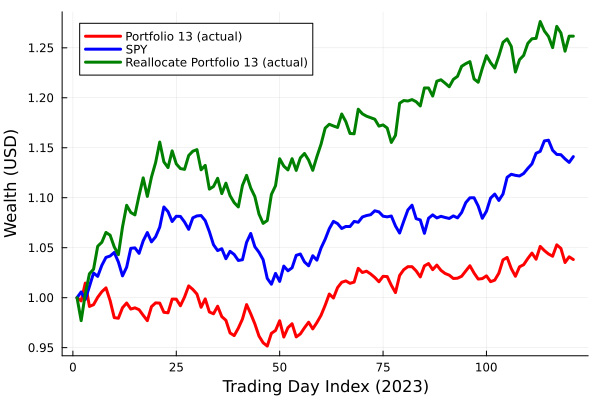

In [169]:
plot((1/portfolio_performance_array_original[1,end]).*portfolio_performance_array_original[:,end], 
    lw=3, c=:red, label="Portfolio $(portfolio_index) (actual)")
plot!((1/SPY_df[1,:volume_weighted_average_price]).*SPY_df[1:number_of_trading_days,:volume_weighted_average_price], lw=3, 
    c=:blue, label="SPY")
plot!((1/portfolio_performance_array_reallocate[1,end]).*portfolio_performance_array_reallocate[:,end], lw=3, 
    c=:green, label="Reallocate Portfolio $(portfolio_index) (actual)")
xlabel!("Trading Day Index (2023)", fontsize=18)
ylabel!("Wealth (USD)", fontsize=18)

## Disclaimer and Risks
__This content is offered solely for training and  informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy,  is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on your evaluation of your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.